In [ ]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке,
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
#
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию,
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными,
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [ ]:
# Данный блок в области 1 НЕ выполняется преподавателем
#
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline


### Область работы 2 (поиск  модели .... )

In [3]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели
# должен быть понятен и очевиден отбор параметров модели
#
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
#

path_train = 'train.csv' # содержит только имя файла, без имен папок !!!
train = pd.read_csv(path_train)
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.2,0.34,0.44,4.2,0.047,51.0,144.0,0.99100,3.01,0.76,12.3,6
1,6.4,0.23,0.27,2.1,0.042,35.0,100.0,0.99094,3.03,0.63,10.9,6
2,6.7,0.26,0.26,4.1,0.073,36.0,202.0,0.99560,3.30,0.67,9.5,5
3,7.4,0.30,0.32,1.7,0.030,23.0,128.0,0.99290,3.17,0.66,10.9,5
4,6.6,0.23,0.32,0.9,0.041,25.0,79.0,0.99260,3.39,0.54,10.2,7


In [4]:
train.shape

(3072, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3072 entries, 0 to 3071
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3072 non-null   float64
 1   volatile acidity      3072 non-null   float64
 2   citric acid           3072 non-null   float64
 3   residual sugar        3072 non-null   float64
 4   chlorides             3072 non-null   float64
 5   free sulfur dioxide   3072 non-null   float64
 6   total sulfur dioxide  3072 non-null   float64
 7   density               3072 non-null   float64
 8   pH                    3072 non-null   float64
 9   sulphates             3072 non-null   float64
 10  alcohol               3072 non-null   float64
 11  quality               3072 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 288.1 KB


In [6]:
train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000
mean,6.848210,0.279076,0.333053,6.061670,0.045817,35.249674,138.234863,0.993852,3.196136,0.490241,10.591113,5.855794
std,0.861172,0.100044,0.121301,4.896565,0.022626,17.463158,43.384731,0.002951,0.152168,0.114038,1.221263,0.889740
min,3.800000,0.080000,0.000000,0.600000,0.013000,2.000000,9.000000,0.987110,2.740000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.260000,1.700000,0.036000,23.000000,107.000000,0.991640,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.900000,0.043000,34.000000,133.000000,0.993600,3.180000,0.480000,10.400000,6.000000
75%,7.400000,0.320000,0.390000,9.100000,0.050000,46.000000,168.000000,0.995800,3.290000,0.550000,11.400000,6.000000
max,11.800000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.810000,1.080000,14.200000,9.000000


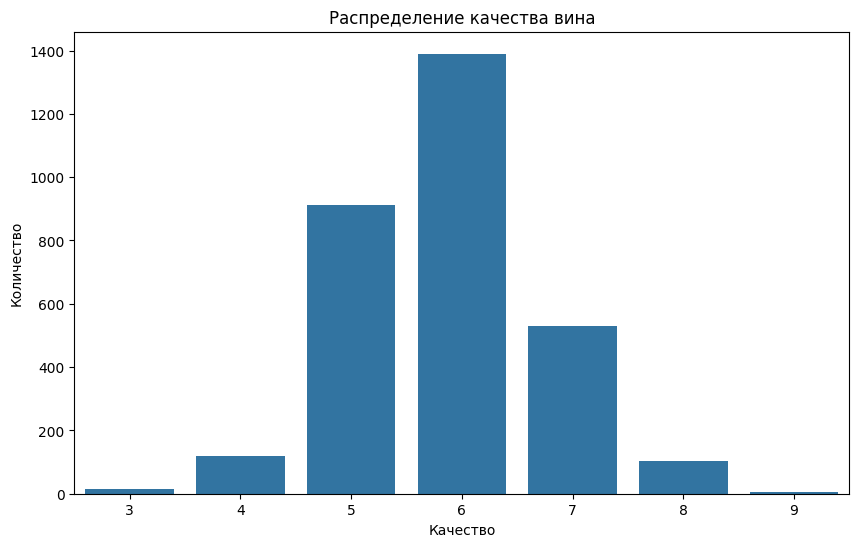

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=train)
plt.title('Распределение качества вина')
plt.xlabel('Качество')
plt.ylabel('Количество')
plt.show()

In [8]:
train['high_quality'] = (train['quality'] >= 6).astype(int)

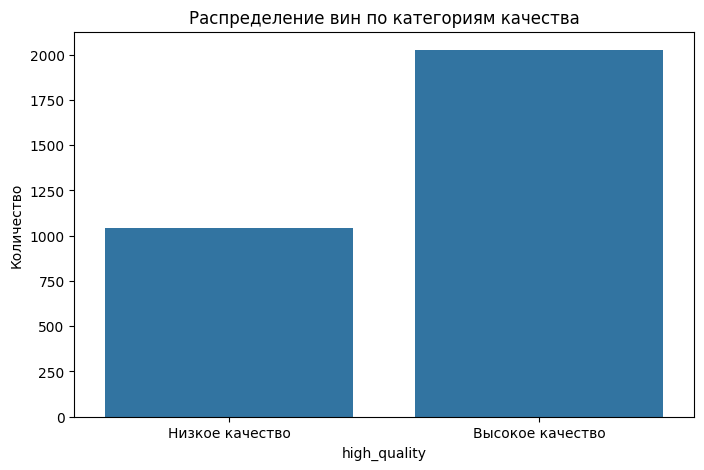

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(x='high_quality', data=train)
plt.title('Распределение вин по категориям качества')
plt.xticks([0, 1], ['Низкое качество', 'Высокое качество'])
plt.ylabel('Количество')
plt.show()

In [13]:
class_balance = train['high_quality'].value_counts(normalize=True)
class_balance[0]


0.3401692708333333

In [14]:
class_balance[1]

0.6598307291666666

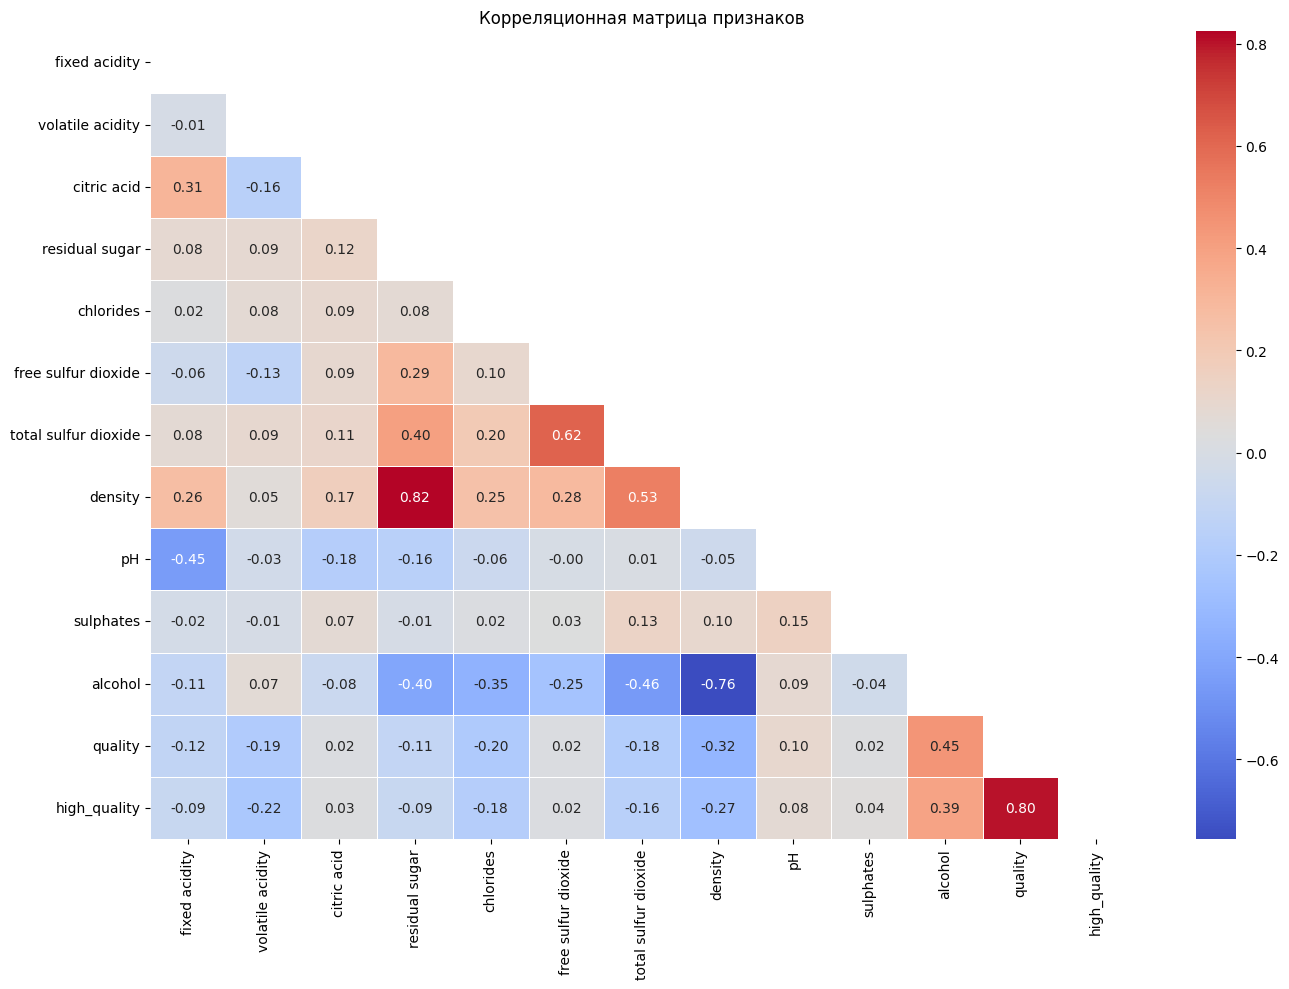

In [15]:
plt.figure(figsize=(14, 10))
corr_matrix = train.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица признаков')
plt.tight_layout()
plt.show()

In [17]:
correlations = corr_matrix['high_quality'].sort_values(ascending=False)
correlations

,high_quality
high_quality,1.000000
quality,0.804268
alcohol,0.387726
pH,0.076829
sulphates,0.044784
citric acid,0.027878
free sulfur dioxide,0.018866
residual sugar,-0.087491
fixed acidity,-0.089112
total sulfur dioxide,-0.163040


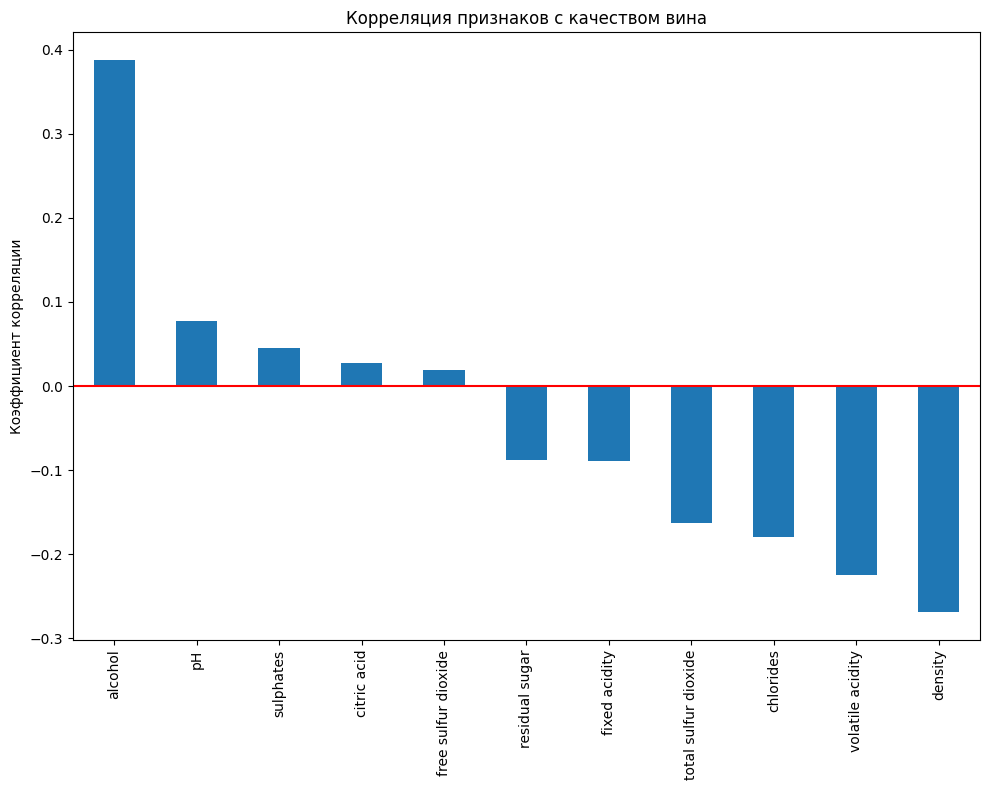

In [18]:
plt.figure(figsize=(10, 8))
correlations = correlations.drop('high_quality')
correlations = correlations.drop('quality')
correlations.plot(kind='bar')
plt.title('Корреляция признаков с качеством вина')
plt.ylabel('Коэффициент корреляции')
plt.axhline(y=0, color='r', linestyle='-')
plt.tight_layout()
plt.show()

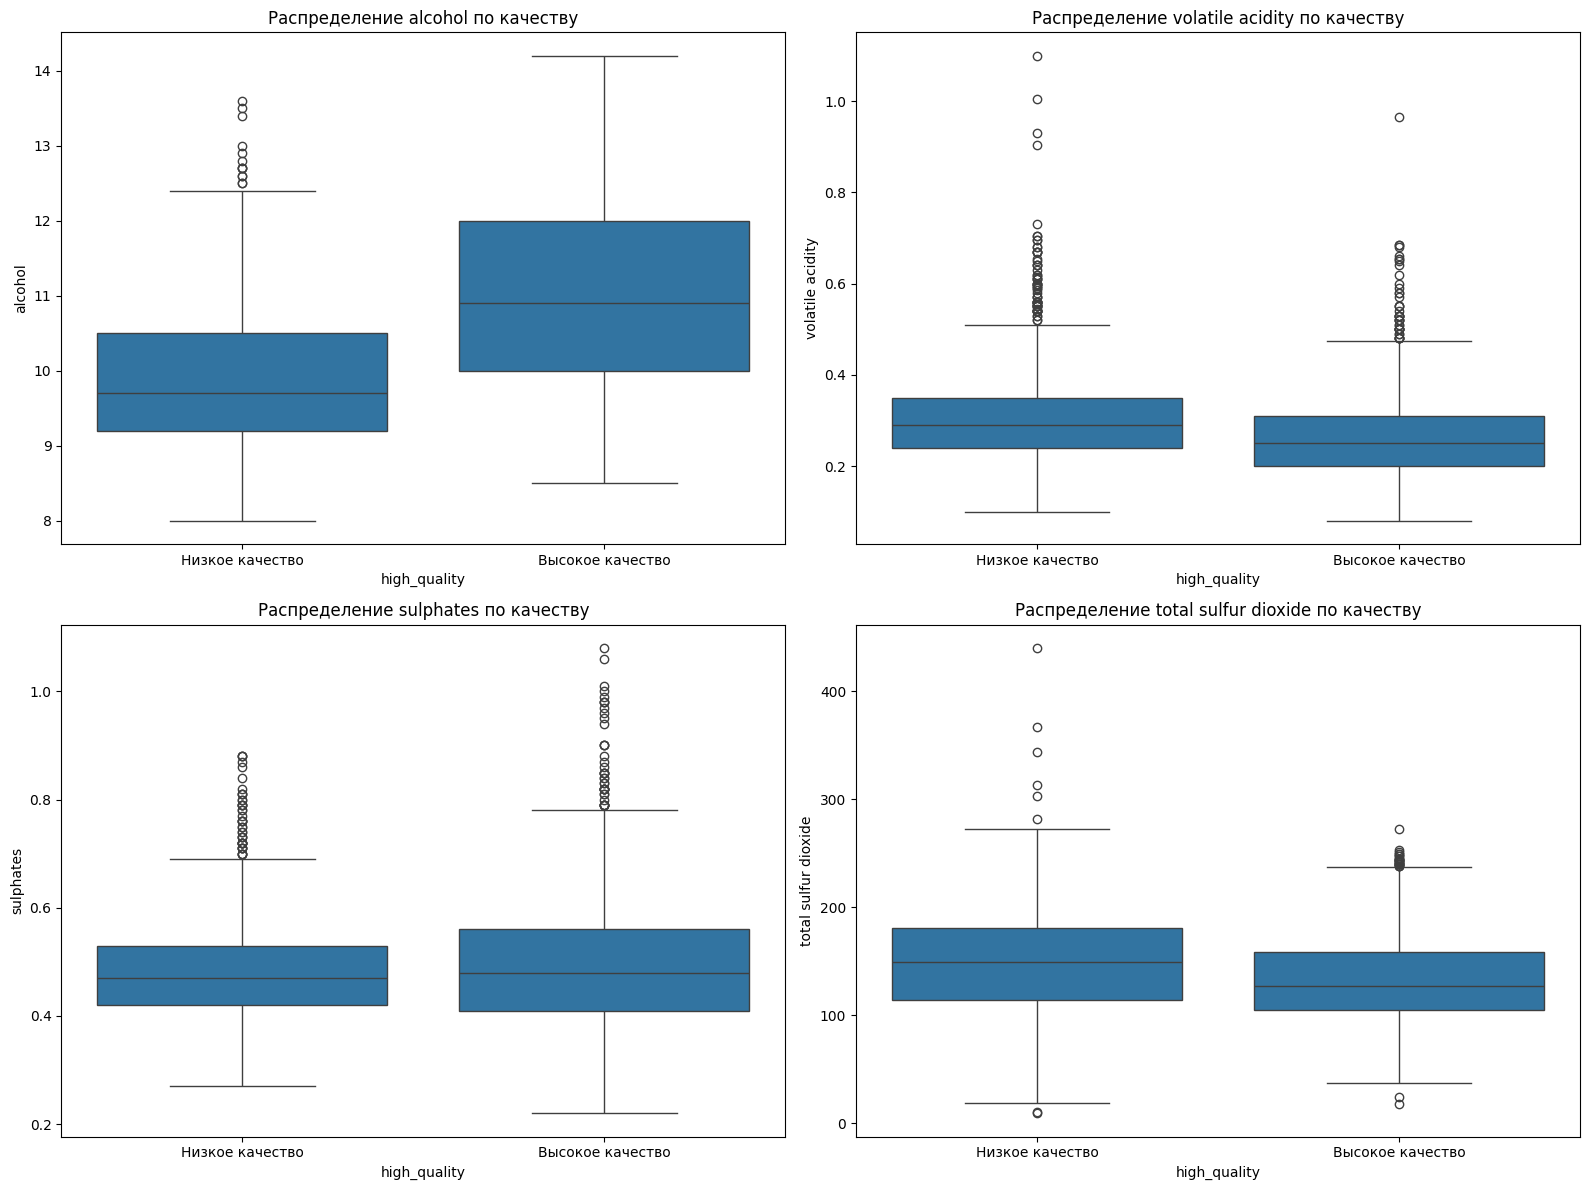

In [19]:
important_features = ['alcohol', 'volatile acidity', 'sulphates', 'total sulfur dioxide']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.boxplot(x='high_quality', y=important_features[0], data=train, ax=axes[0, 0])
axes[0, 0].set_title(f'Распределение {important_features[0]} по качеству')
axes[0, 0].set_xticklabels(['Низкое качество', 'Высокое качество'])

sns.boxplot(x='high_quality', y=important_features[1], data=train, ax=axes[0, 1])
axes[0, 1].set_title(f'Распределение {important_features[1]} по качеству')
axes[0, 1].set_xticklabels(['Низкое качество', 'Высокое качество'])

sns.boxplot(x='high_quality', y=important_features[2], data=train, ax=axes[1, 0])
axes[1, 0].set_title(f'Распределение {important_features[2]} по качеству')
axes[1, 0].set_xticklabels(['Низкое качество', 'Высокое качество'])

sns.boxplot(x='high_quality', y=important_features[3], data=train, ax=axes[1, 1])
axes[1, 1].set_title(f'Распределение {important_features[3]} по качеству')
axes[1, 1].set_xticklabels(['Низкое качество', 'Высокое качество'])

plt.tight_layout()
plt.show()

In [26]:
X = train.drop(['quality', 'high_quality'], axis=1)
y = train['high_quality']
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train.shape

(2457, 11)

In [27]:
X_val.shape

(615, 11)

In [28]:
X_train_enhanced = X_train.copy()
X_val_enhanced = X_val.copy()

X_train_enhanced['alcohol_to_density_ratio'] = X_train_enhanced['alcohol'] / X_train_enhanced['density']
X_train_enhanced['total_acidity'] = X_train_enhanced['fixed acidity'] + X_train_enhanced['volatile acidity'] + X_train_enhanced['citric acid']
X_train_enhanced['free_total_so2_ratio'] = X_train_enhanced['free sulfur dioxide'] / X_train_enhanced['total sulfur dioxide']
X_train_enhanced['sulphates_to_alcohol_ratio'] = X_train_enhanced['sulphates'] / X_train_enhanced['alcohol']
X_train_enhanced['sugar_to_acidity_ratio'] = X_train_enhanced['residual sugar'] / X_train_enhanced['total_acidity']
X_train_enhanced['pH_alcohol_interaction'] = X_train_enhanced['pH'] * X_train_enhanced['alcohol']

X_val_enhanced['alcohol_to_density_ratio'] = X_val_enhanced['alcohol'] / X_val_enhanced['density']
X_val_enhanced['total_acidity'] = X_val_enhanced['fixed acidity'] + X_val_enhanced['volatile acidity'] + X_val_enhanced['citric acid']
X_val_enhanced['free_total_so2_ratio'] = X_val_enhanced['free sulfur dioxide'] / X_val_enhanced['total sulfur dioxide']
X_val_enhanced['sulphates_to_alcohol_ratio'] = X_val_enhanced['sulphates'] / X_val_enhanced['alcohol']
X_val_enhanced['sugar_to_acidity_ratio'] = X_val_enhanced['residual sugar'] / X_val_enhanced['total_acidity']
X_val_enhanced['pH_alcohol_interaction'] = X_val_enhanced['pH'] * X_val_enhanced['alcohol']

X_train_enhanced = X_train_enhanced.replace([np.inf, -np.inf], np.nan).fillna(0)
X_val_enhanced = X_val_enhanced.replace([np.inf, -np.inf], np.nan).fillna(0)

In [30]:
# Создаем список моделей и скалеров для сравнения
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()
svm_linear_model = SVC(kernel='linear', probability=True, random_state=42)
svm_rbf_model = SVC(kernel='rbf', probability=True, random_state=42)

# Создаем скалеры напрямую
std_scaler = StandardScaler()
robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()
normalizer = Normalizer()

# Создаем DataFrame для хранения результатов
results = pd.DataFrame(columns=['Модель', 'Скалер', 'Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC'])

# Комбинация 1: Логистическая регрессия + StandardScaler
pipeline1 = Pipeline([
    ('scaler', std_scaler),
    ('model', logreg_model)
])
cv_accuracy1 = cross_val_score(pipeline1, X_train_enhanced, y_train, cv=5, scoring='accuracy').mean()
cv_precision1 = cross_val_score(pipeline1, X_train_enhanced, y_train, cv=5, scoring='precision').mean()
cv_recall1 = cross_val_score(pipeline1, X_train_enhanced, y_train, cv=5, scoring='recall').mean()
cv_f1_1 = cross_val_score(pipeline1, X_train_enhanced, y_train, cv=5, scoring='f1').mean()
cv_roc_auc1 = cross_val_score(pipeline1, X_train_enhanced, y_train, cv=5, scoring='roc_auc').mean()
results.loc[0] = ['Логистическая регрессия', 'StandardScaler', cv_accuracy1, cv_precision1, cv_recall1, cv_f1_1, cv_roc_auc1]

# Комбинация 2: Логистическая регрессия + RobustScaler
pipeline2 = Pipeline([
    ('scaler', robust_scaler),
    ('model', logreg_model)
])
cv_accuracy2 = cross_val_score(pipeline2, X_train_enhanced, y_train, cv=5, scoring='accuracy').mean()
cv_precision2 = cross_val_score(pipeline2, X_train_enhanced, y_train, cv=5, scoring='precision').mean()
cv_recall2 = cross_val_score(pipeline2, X_train_enhanced, y_train, cv=5, scoring='recall').mean()
cv_f1_2 = cross_val_score(pipeline2, X_train_enhanced, y_train, cv=5, scoring='f1').mean()
cv_roc_auc2 = cross_val_score(pipeline2, X_train_enhanced, y_train, cv=5, scoring='roc_auc').mean()
results.loc[1] = ['Логистическая регрессия', 'RobustScaler', cv_accuracy2, cv_precision2, cv_recall2, cv_f1_2, cv_roc_auc2]

# Комбинация 3: SVM (RBF) + StandardScaler
pipeline3 = Pipeline([
    ('scaler', std_scaler),
    ('model', svm_rbf_model)
])
cv_accuracy3 = cross_val_score(pipeline3, X_train_enhanced, y_train, cv=5, scoring='accuracy').mean()
cv_precision3 = cross_val_score(pipeline3, X_train_enhanced, y_train, cv=5, scoring='precision').mean()
cv_recall3 = cross_val_score(pipeline3, X_train_enhanced, y_train, cv=5, scoring='recall').mean()
cv_f1_3 = cross_val_score(pipeline3, X_train_enhanced, y_train, cv=5, scoring='f1').mean()
cv_roc_auc3 = cross_val_score(pipeline3, X_train_enhanced, y_train, cv=5, scoring='roc_auc').mean()
results.loc[2] = ['SVM (RBF ядро)', 'StandardScaler', cv_accuracy3, cv_precision3, cv_recall3, cv_f1_3, cv_roc_auc3]

# Комбинация 4: SVM (RBF) + RobustScaler
pipeline4 = Pipeline([
    ('scaler', robust_scaler),
    ('model', svm_rbf_model)
])
cv_accuracy4 = cross_val_score(pipeline4, X_train_enhanced, y_train, cv=5, scoring='accuracy').mean()
cv_precision4 = cross_val_score(pipeline4, X_train_enhanced, y_train, cv=5, scoring='precision').mean()
cv_recall4 = cross_val_score(pipeline4, X_train_enhanced, y_train, cv=5, scoring='recall').mean()
cv_f1_4 = cross_val_score(pipeline4, X_train_enhanced, y_train, cv=5, scoring='f1').mean()
cv_roc_auc4 = cross_val_score(pipeline4, X_train_enhanced, y_train, cv=5, scoring='roc_auc').mean()
results.loc[3] = ['SVM (RBF ядро)', 'RobustScaler', cv_accuracy4, cv_precision4, cv_recall4, cv_f1_4, cv_roc_auc4]

# Комбинация 5: KNN + StandardScaler
pipeline5 = Pipeline([
    ('scaler', std_scaler),
    ('model', knn_model)
])
cv_accuracy5 = cross_val_score(pipeline5, X_train_enhanced, y_train, cv=5, scoring='accuracy').mean()
cv_precision5 = cross_val_score(pipeline5, X_train_enhanced, y_train, cv=5, scoring='precision').mean()
cv_recall5 = cross_val_score(pipeline5, X_train_enhanced, y_train, cv=5, scoring='recall').mean()
cv_f1_5 = cross_val_score(pipeline5, X_train_enhanced, y_train, cv=5, scoring='f1').mean()
cv_roc_auc5 = cross_val_score(pipeline5, X_train_enhanced, y_train, cv=5, scoring='roc_auc').mean()
results.loc[4] = ['K ближайших соседей', 'StandardScaler', cv_accuracy5, cv_precision5, cv_recall5, cv_f1_5, cv_roc_auc5]

# Комбинация 6: Наивный Байес + StandardScaler
pipeline6 = Pipeline([
    ('scaler', std_scaler),
    ('model', nb_model)
])
cv_accuracy6 = cross_val_score(pipeline6, X_train_enhanced, y_train, cv=5, scoring='accuracy').mean()
cv_precision6 = cross_val_score(pipeline6, X_train_enhanced, y_train, cv=5, scoring='precision').mean()
cv_recall6 = cross_val_score(pipeline6, X_train_enhanced, y_train, cv=5, scoring='recall').mean()
cv_f1_6 = cross_val_score(pipeline6, X_train_enhanced, y_train, cv=5, scoring='f1').mean()
cv_roc_auc6 = cross_val_score(pipeline6, X_train_enhanced, y_train, cv=5, scoring='roc_auc').mean()
results.loc[5] = ['Наивный Байес', 'StandardScaler', cv_accuracy6, cv_precision6, cv_recall6, cv_f1_6, cv_roc_auc6]

# Комбинация 7: SVM (линейное ядро) + StandardScaler
pipeline7 = Pipeline([
    ('scaler', std_scaler),
    ('model', svm_linear_model)
])
cv_accuracy7 = cross_val_score(pipeline7, X_train_enhanced, y_train, cv=5, scoring='accuracy').mean()
cv_precision7 = cross_val_score(pipeline7, X_train_enhanced, y_train, cv=5, scoring='precision').mean()
cv_recall7 = cross_val_score(pipeline7, X_train_enhanced, y_train, cv=5, scoring='recall').mean()
cv_f1_7 = cross_val_score(pipeline7, X_train_enhanced, y_train, cv=5, scoring='f1').mean()
cv_roc_auc7 = cross_val_score(pipeline7, X_train_enhanced, y_train, cv=5, scoring='roc_auc').mean()
results.loc[6] = ['SVM (линейное ядро)', 'StandardScaler', cv_accuracy7, cv_precision7, cv_recall7, cv_f1_7, cv_roc_auc7]

# Сортируем результаты по accuracy
results = results.sort_values('Accuracy', ascending=False)
results

,Модель,Скалер,Accuracy,Precision,Recall,F1,ROC AUC
2,SVM (RBF ядро),StandardScaler,0.768823,0.793214,0.879088,0.833790,0.807618
3,SVM (RBF ядро),RobustScaler,0.763939,0.788493,0.877846,0.830653,0.807326
1,Логистическая регрессия,RobustScaler,0.755389,0.784550,0.867975,0.823996,0.807247
0,Логистическая регрессия,StandardScaler,0.754982,0.783762,0.868594,0.823875,0.807125
6,SVM (линейное ядро),StandardScaler,0.753352,0.777983,0.877225,0.824357,0.803947
4,K ближайших соседей,StandardScaler,0.738703,0.778626,0.843934,0.809944,0.779759
5,Наивный Байес,StandardScaler,0.706968,0.828545,0.701411,0.759376,0.765920


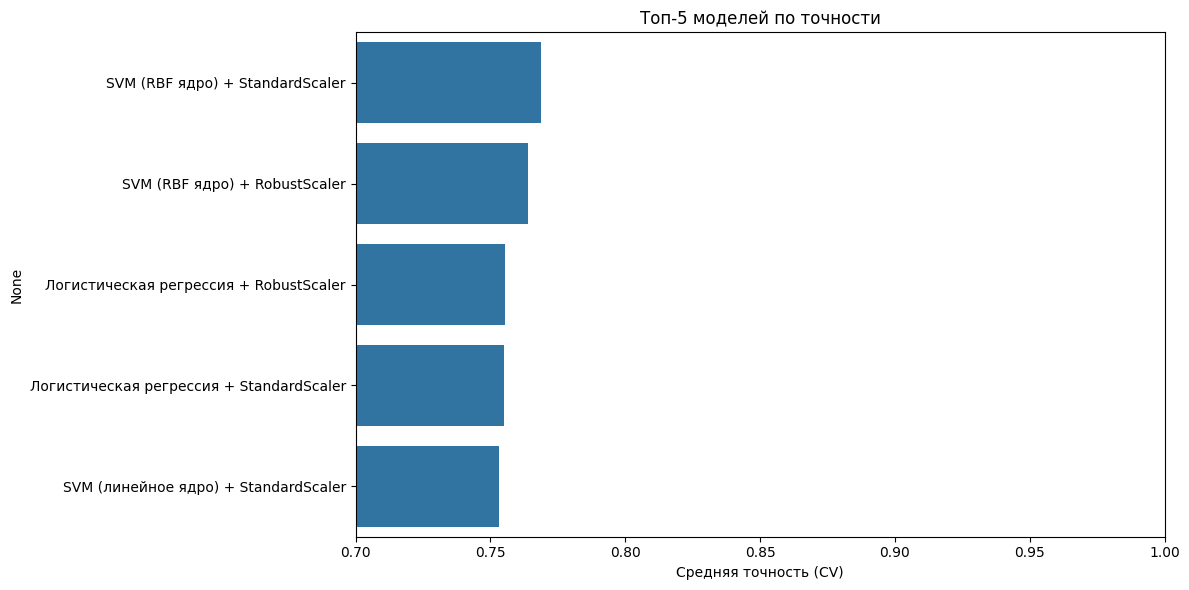

In [31]:
# Визуализируем топ-5 моделей по точности
plt.figure(figsize=(12, 6))
top5 = results.head(5)
sns.barplot(x='Accuracy', y=top5['Модель'] + ' + ' + top5['Скалер'], data=top5)
plt.title('Топ-5 моделей по точности')
plt.xlabel('Средняя точность (CV)')
plt.xlim(0.7, 1.0)
plt.tight_layout()
plt.show()

In [32]:
# Настраиваем SVM с RBF ядром и RobustScaler
svm_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', SVC(probability=True, random_state=42))
])

param_grid = {
    'classifier__C': [0.1, 1, 10, 100, 1000],
    'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__kernel': ['rbf']
}

grid = GridSearchCV(
    svm_pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=True
)

grid.fit(X_train_enhanced, y_train)

grid.best_params_

{'classifier__C': 1, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}

In [33]:
grid.best_score_

0.7655680294073817

In [34]:
grid_results = pd.DataFrame(grid.cv_results_)
grid_results = grid_results.sort_values('mean_test_score', ascending=False)

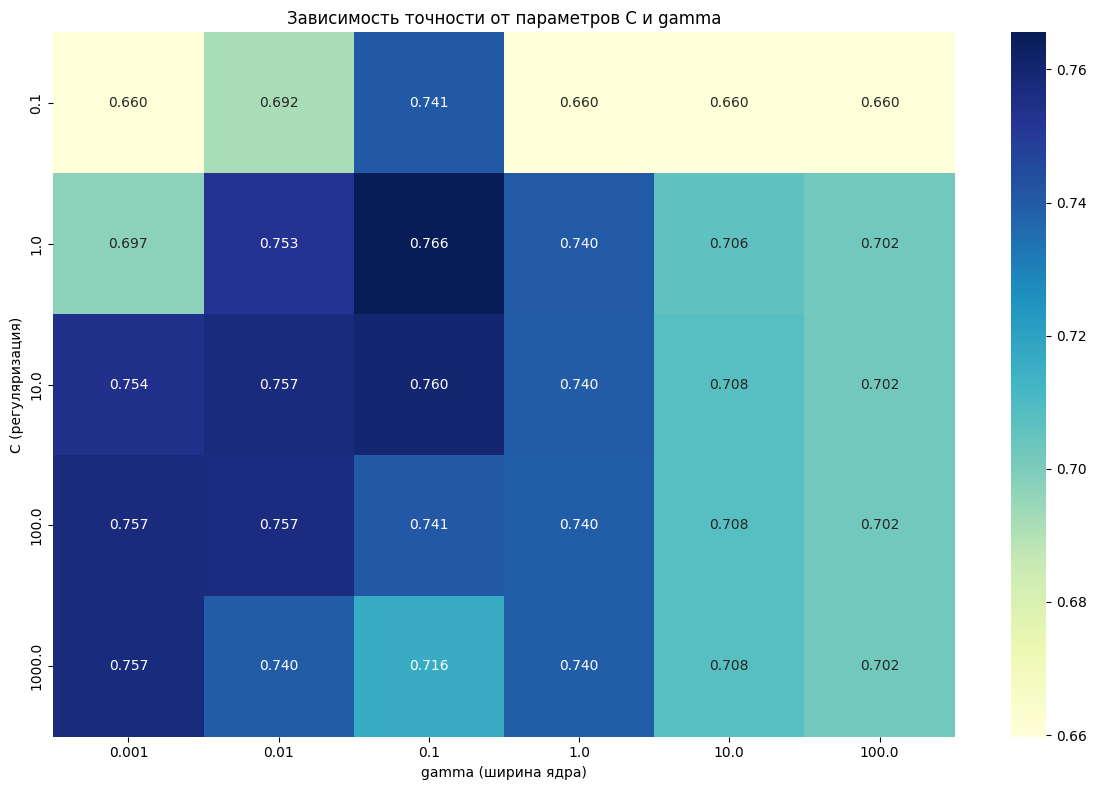

In [35]:
pivot_table = pd.pivot_table(
    grid_results,
    values='mean_test_score',
    index='param_classifier__C',
    columns='param_classifier__gamma'
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='.3f', cmap='YlGnBu')
plt.title('Зависимость точности от параметров C и gamma')
plt.ylabel('C (регуляризация)')
plt.xlabel('gamma (ширина ядра)')
plt.tight_layout()
plt.show()

In [36]:
# KNN
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

knn_param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski'],
    'classifier__p': [1, 2]
}

knn_grid = GridSearchCV(
    knn_pipeline,
    knn_param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=True
)

knn_grid.fit(X_train_enhanced, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__metric': ['euclidean', 'manhattan',
                                                'minkowski'],
                         'classifier__n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'classifier__p': [1, 2],
                         'classifier__weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy')

In [37]:
# Логистическая регрессия
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42, max_iter=2000))
])

lr_param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear'],
    'classifier__class_weight': ['balanced', None]
}

lr_grid = GridSearchCV(
    lr_pipeline,
    lr_param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=True
)

lr_grid.fit(X_train_enhanced, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        LogisticRegression(max_iter=2000,
                                                           random_state=42))]),
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'classifier__class_weight': ['balanced', None],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear']},
             return_train_score=True, scoring='accuracy')

In [41]:
best_model = grid.best_estimator_

val_predictions = best_model.predict(X_val_enhanced)
val_probabilities = best_model.predict_proba(X_val_enhanced)[:, 1]

accuracy = accuracy_score(y_val, val_predictions)
precision = precision_score(y_val, val_predictions)
recall = recall_score(y_val, val_predictions)
f1 = f1_score(y_val, val_predictions)
roc_auc = roc_auc_score(y_val, val_probabilities)

metrics_dict = {
    'Метрика': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC'],
    'Значение': [accuracy, precision, recall, f1, roc_auc]
}

metrics_df = pd.DataFrame(metrics_dict)
display(metrics_df.style.background_gradient(cmap='Blues', subset=['Значение']).format({'Значение': '{:.4f}'}))

,Метрика,Значение
0,Accuracy,0.7561
1,Precision,0.7844
2,Recall,0.8695
3,F1-score,0.8248
4,ROC AUC,0.8040


<Figure size 800x600 with 0 Axes>

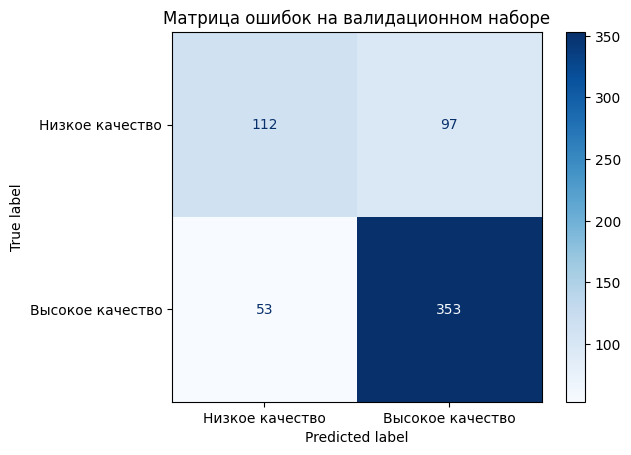

In [42]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_val, val_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Низкое качество', 'Высокое качество'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Матрица ошибок на валидационном наборе')
plt.show()

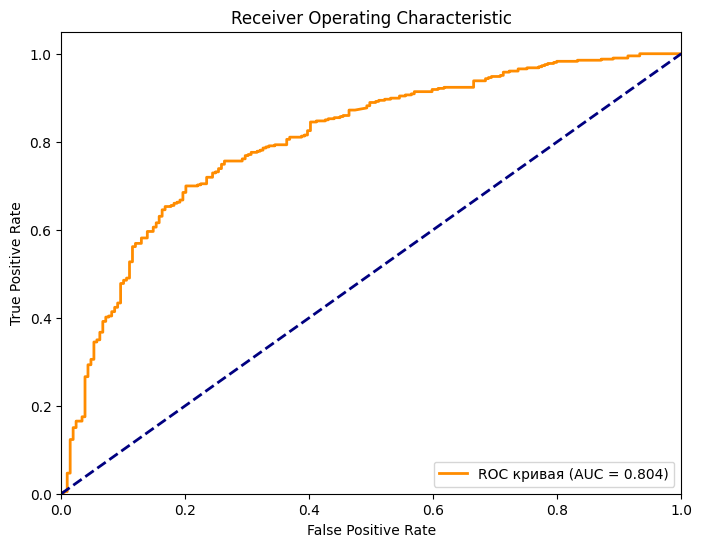

In [39]:
fpr, tpr, _ = roc_curve(y_val, val_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC кривая (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [46]:
classification_report(y_val, val_predictions, target_names=['Низкое качество', 'Высокое качество'])

'                  precision    recall  f1-score   support\n\n Низкое качество       0.68      0.54      0.60       209\nВысокое качество       0.78      0.87      0.82       406\n\n        accuracy                           0.76       615\n       macro avg       0.73      0.70      0.71       615\n    weighted avg       0.75      0.76      0.75       615\n'

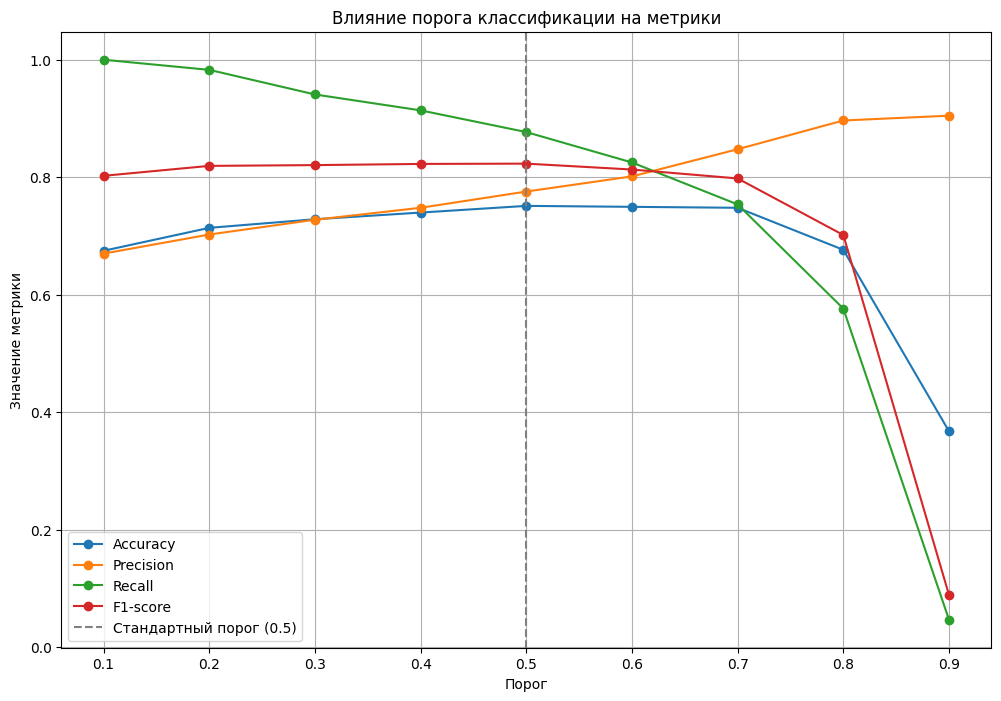

In [47]:
thresholds = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

y_pred_matrix = np.greater_equal.outer(val_probabilities, thresholds).astype(int)

accuracy_values = np.array([accuracy_score(y_val, y_pred_matrix[:, i]) for i in range(len(thresholds))])
precision_values = np.array([precision_score(y_val, y_pred_matrix[:, i]) for i in range(len(thresholds))])
recall_values = np.array([recall_score(y_val, y_pred_matrix[:, i]) for i in range(len(thresholds))])
f1_values = np.array([f1_score(y_val, y_pred_matrix[:, i]) for i in range(len(thresholds))])

threshold_df = pd.DataFrame({
    'threshold': thresholds,
    'accuracy': accuracy_values,
    'precision': precision_values,
    'recall': recall_values,
    'f1': f1_values
})

plt.figure(figsize=(12, 8))
plt.plot(threshold_df['threshold'], threshold_df['accuracy'], marker='o', label='Accuracy')
plt.plot(threshold_df['threshold'], threshold_df['precision'], marker='o', label='Precision')
plt.plot(threshold_df['threshold'], threshold_df['recall'], marker='o', label='Recall')
plt.plot(threshold_df['threshold'], threshold_df['f1'], marker='o', label='F1-score')
plt.axvline(x=0.5, color='gray', linestyle='--', label='Стандартный порог (0.5)')
plt.title('Влияние порога классификации на метрики')
plt.xlabel('Порог')
plt.ylabel('Значение метрики')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

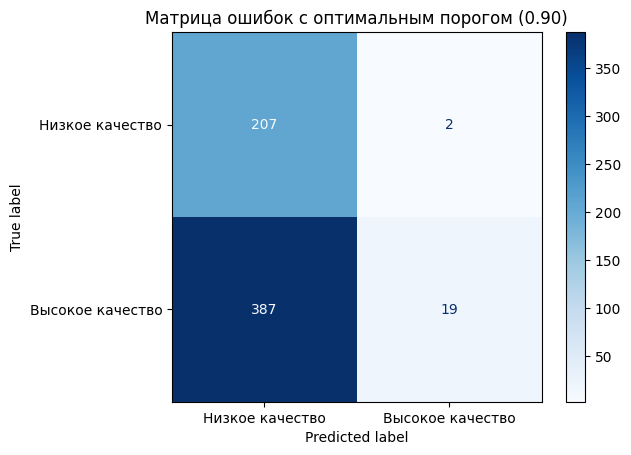

In [48]:
# Определение оптимального порога для бизнес-задачи
# Для владельца винного магазина приоритет - высокая точность (precision)
optimal_threshold_idx = np.argmax(precision_values)
optimal_threshold = thresholds[optimal_threshold_idx]

y_pred_optimal = (val_probabilities >= optimal_threshold).astype(int)
plt.figure(figsize=(8, 6))
cm_optimal = confusion_matrix(y_val, y_pred_optimal)
disp_optimal = ConfusionMatrixDisplay(confusion_matrix=cm_optimal, display_labels=['Низкое качество', 'Высокое качество'])
disp_optimal.plot(cmap='Blues', values_format='d')
plt.title(f'Матрица ошибок с оптимальным порогом ({optimal_threshold:.2f})')
plt.show()

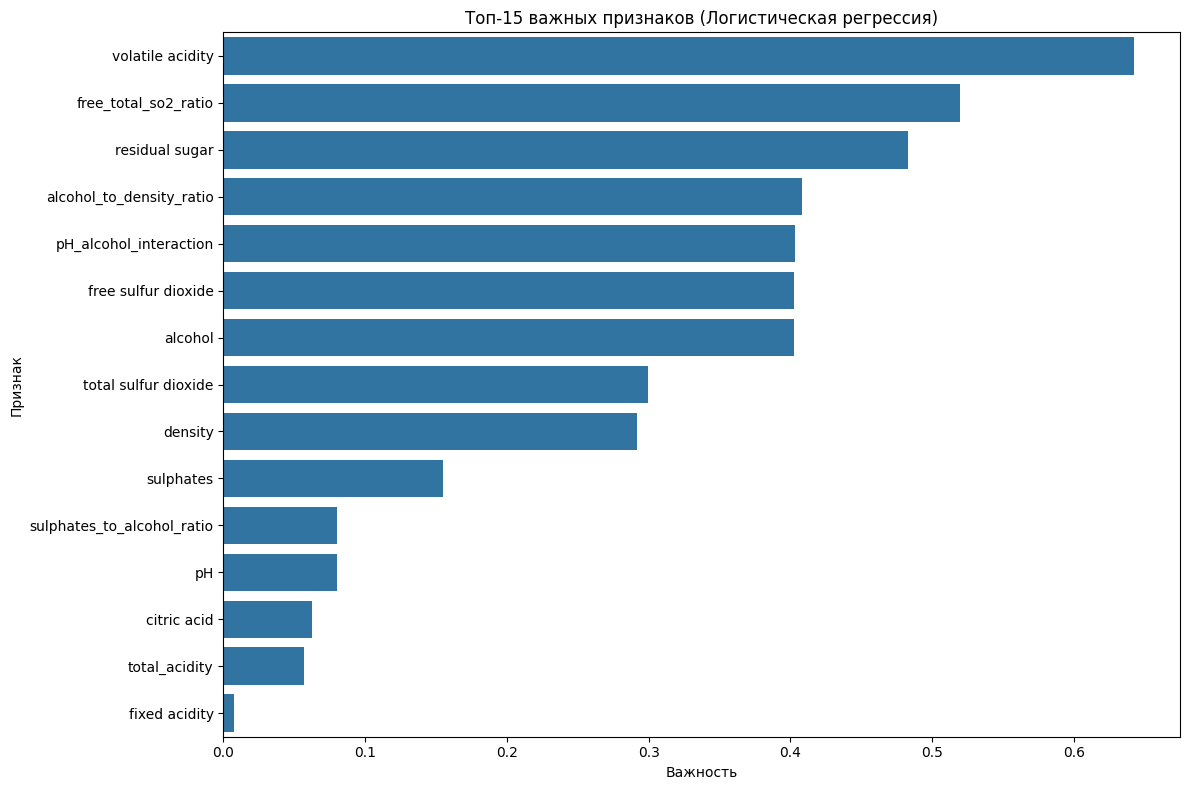

In [49]:
best_lr_model = lr_grid.best_estimator_
feature_names = X_train_enhanced.columns

# Если доступны веса (для линейных моделей)
if hasattr(best_lr_model.named_steps['classifier'], 'coef_'):
    coefficients = best_lr_model.named_steps['classifier'].coef_[0]
    feature_importance = pd.DataFrame({'Признак': feature_names, 'Важность': np.abs(coefficients)})
    feature_importance = feature_importance.sort_values('Важность', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Важность', y='Признак', data=feature_importance.head(15))
    plt.title('Топ-15 важных признаков (Логистическая регрессия)')
    plt.tight_layout()
    plt.show()

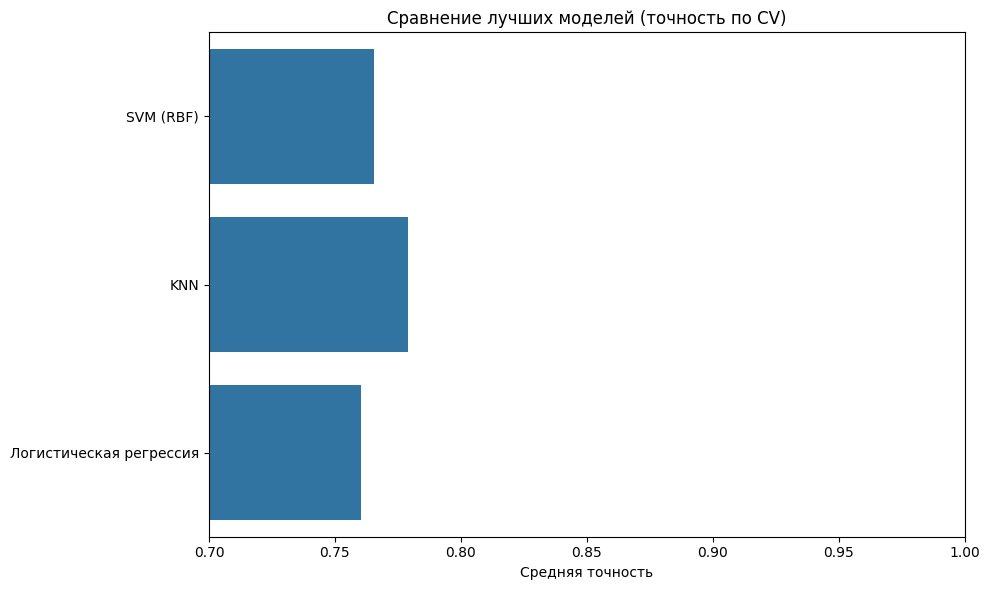

In [50]:
best_models = {
    'SVM (RBF)': grid.best_score_,
    'KNN': knn_grid.best_score_,
    'Логистическая регрессия': lr_grid.best_score_
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(best_models.values()), y=list(best_models.keys()))
plt.title('Сравнение лучших моделей (точность по CV)')
plt.xlabel('Средняя точность')
plt.xlim(0.7, 1.0)
plt.tight_layout()
plt.show()

In [51]:
best_model_name = max(best_models, key=best_models.get)
best_model_score = best_models[best_model_name]
print(f"Лучшая модель: {best_model_name} с точностью {best_model_score:.4f}")
# да простят меня за принт, не знал как лучше это вывести именно текстом

Лучшая модель: KNN с точностью 0.7790


In [55]:
best_params = knn_grid.best_params_
best_params

{'classifier__metric': 'manhattan',
 'classifier__n_neighbors': 13,
 'classifier__p': 1,
 'classifier__weights': 'distance'}